In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Fundamentos_ML_Curso/Bases/'

### Importando bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

### Leitura da base e analise de atributos

In [4]:
base = pd.read_csv(f'{file_path}/modelagem_rh.csv')

In [5]:
base.shape

(14999, 10)

In [6]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Analisando o atributo "Saiu"

In [7]:
base.saiu.value_counts()

,count
saiu,
0,11428
1,3571


([<matplotlib.axis.XTick at 0x78679e746140>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

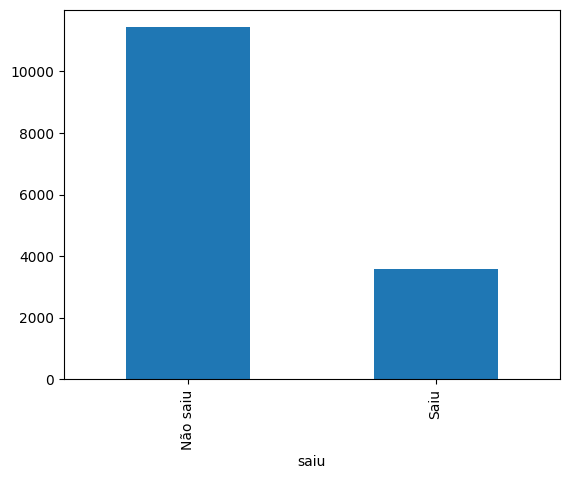

In [8]:
base.saiu.value_counts().plot(kind='bar')
plt.xticks((0,1),['Não saiu', 'Saiu'])

In [9]:
base.saiu.value_counts()/len(base)*100

,count
saiu,
0,76.191746
1,23.808254


### Analisando se existe algum departamento com mais desligamento de colaboradores


In [10]:
base.departamento	.value_counts()

,count
departamento,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [11]:
pd.crosstab(base.departamento, base.saiu)

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [12]:
valores = pd.crosstab(base.departamento, base.saiu)

In [13]:
soma = valores.sum(axis=1)
soma

,0
departamento,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [14]:
valores.divide(soma, axis=0)*100

saiu,0,1
departamento,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


### Analisando se o atributo "Salario" influencia ou direciona algo nesse desligamento

In [15]:
base.salario.value_counts()

,count
salario,
low,7316
medium,6446
high,1237


In [16]:
pd.crosstab(base.salario, base.saiu)

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [17]:
valores_salario = pd.crosstab(base.salario, base.saiu)
soma_salario = valores_salario.sum(axis=1)
soma_salario
valores_salario.divide(soma_salario, axis=0)*100

saiu,0,1
salario,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


<Axes: xlabel='salario'>

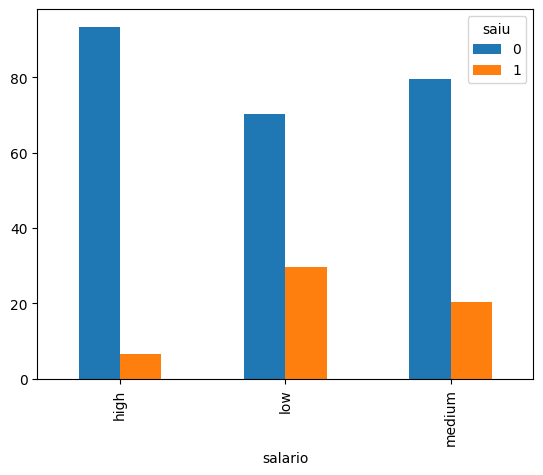

In [18]:
porc_salario = valores_salario.divide(soma_salario, axis=0)*100
porc_salario.plot(kind='bar')

<Axes: xlabel='salario'>

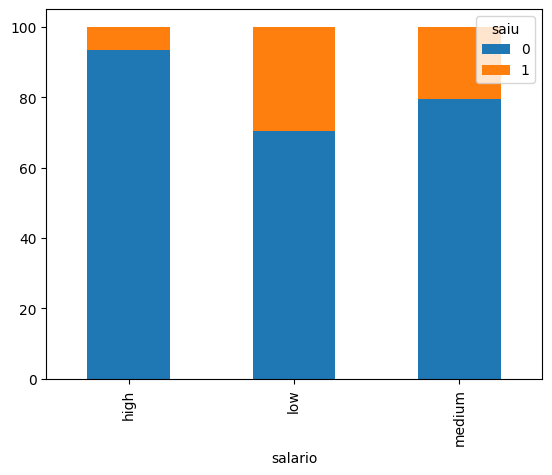

In [19]:
porc_salario.plot(kind='bar', stacked=True)

## Pré-Processamento

In [20]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
base.isnull().sum()

,0
nivel_satisfacao,21
ult_avaliacao,0
num_projetos,0
media_horas_mes,0
tempo_empresa,0
aci_trabalho,0
saiu,0
promocao_ult_5anos,0
departamento,0
salario,0


In [22]:
base.nivel_satisfacao.isnull()

,nivel_satisfacao
0,False
1,False
2,False
3,False
4,False
...,...
14994,False
14995,False
14996,False
14997,False


In [23]:
base.loc[base.nivel_satisfacao.isnull(),'nivel_satisfacao'] = base.nivel_satisfacao.mean()

In [24]:
base.isnull().sum()

,0
nivel_satisfacao,0
ult_avaliacao,0
num_projetos,0
media_horas_mes,0
tempo_empresa,0
aci_trabalho,0
saiu,0
promocao_ult_5anos,0
departamento,0
salario,0


In [25]:
base = pd.get_dummies(base, drop_first=True)

In [26]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


#Normalização dos dados

In [27]:
base.max()

,0
nivel_satisfacao,1.0
ult_avaliacao,1.0
num_projetos,7
media_horas_mes,310
tempo_empresa,10
aci_trabalho,1
saiu,1
promocao_ult_5anos,1
departamento_RandD,True
departamento_accounting,True


In [28]:
pd.DataFrame([base.max(), base.min()], index=['max','min'])

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7,310,10,1,1,1,True,True,True,True,True,True,True,True,True,True,True
min,0.09,0.36,2,96,2,0,0,0,False,False,False,False,False,False,False,False,False,False,False


In [29]:
pd.DataFrame([base.max(), base.min()], index=['max','min']).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7,2
media_horas_mes,310,96
tempo_empresa,10,2
aci_trabalho,1,0
saiu,1,0
promocao_ult_5anos,1,0
departamento_RandD,True,False
departamento_accounting,True,False


In [30]:
x = base.values
x

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [31]:
minmax = preprocessing.MinMaxScaler()

In [32]:
x_scaled = minmax.fit_transform(x)
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [33]:
base = pd.DataFrame(x_scaled, columns=base.columns)

In [34]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
pd.DataFrame([base.max(), base.min()], index=['max','min']).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


## Modelo

In [36]:
cols = list(base.columns)
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'saiu',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [37]:
cols.remove('saiu')
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [38]:
x = base[cols]

In [39]:
y = base['saiu']

### Importando os algoritmos para a modelagem KNN E árvore de decisão

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

### Seprarando o conjunto de Treinamento
80% Treinamento
20% Validação/ Teste


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_teste, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [44]:
x_train

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
9088,0.846154,0.828125,0.2,0.719626,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14183,0.505495,0.703125,0.2,0.668224,0.750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5394,0.901099,0.312500,0.2,0.336449,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10058,0.824176,0.609375,0.0,0.336449,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
861,0.373626,0.187500,0.0,0.224299,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,0.978022,0.515625,0.2,0.261682,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2172,0.681319,0.281250,0.4,0.556075,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11884,0.571429,0.203125,0.2,0.836449,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7049,0.637363,0.250000,0.2,0.827103,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
print(x_train.shape, x_teste.shape)

(11999, 18) (3000, 18)


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
predicted = knn.predict(x_teste)

In [49]:
accuracy_score(predicted, y_test)

0.9536666666666667

In [50]:
confusion_matrix(predicted, y_test)

array([[2181,   50],
       [  89,  680]])

In [51]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
accuracy_score(tree.predict(x_teste), y_test)

0.9786666666666667

In [53]:
confusion_matrix(tree.predict(x_teste),y_test)

array([[2228,   22],
       [  42,  708]])

### Validação cruzada

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
scores = cross_val_score(knn, x,y, cv=5, scoring='accuracy')

In [56]:
scores

array([0.96666667, 0.931     , 0.93433333, 0.95733333, 0.95165055])

In [57]:
scores.mean()

0.9481967767033457

In [58]:
scores.std() #Desvio padrão

0.013597545694866528

In [59]:
#Árvore de decisão
scores_tree = cross_val_score(tree, x, y, cv=5, scoring ='accuracy')

In [60]:
scores_tree

array([0.97966667, 0.96266667, 0.96933333, 0.99066667, 0.97732578])

In [61]:
scores_tree.mean()

0.9759318217183507

In [62]:
scores_tree.std() #árvore de decisão ganhou..

0.009513277210542872

In [63]:
#Importância dos atributos
tree.feature_importances_

array([4.96569629e-01, 1.17766600e-01, 1.06865588e-01, 1.18216996e-01,
       1.41316855e-01, 8.91888444e-04, 2.27909078e-05, 8.22750985e-04,
       9.22510314e-04, 5.78127694e-04, 5.41590329e-04, 4.69271808e-04,
       1.09652191e-03, 3.23434106e-03, 1.94969416e-03, 3.00532611e-03,
       4.41336720e-03, 1.31615134e-03])

In [64]:
pd.DataFrame(tree.feature_importances_, index=x.columns)

,0
nivel_satisfacao,0.496570
ult_avaliacao,0.117767
num_projetos,0.106866
media_horas_mes,0.118217
tempo_empresa,0.141317
aci_trabalho,0.000892
promocao_ult_5anos,0.000023
departamento_RandD,0.000823
departamento_accounting,0.000923
departamento_hr,0.000578


<Axes: >

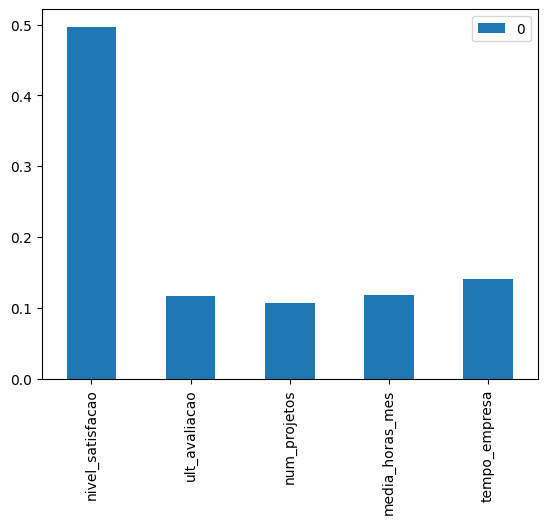

In [65]:
pd.DataFrame(tree.feature_importances_, index=x.columns)[:5].plot(kind='bar') #Verificando as cinco primeiras linhas

Deply do modelo

In [66]:
import pickle

In [67]:
tree.fit(x,y)

DecisionTreeClassifier()

In [68]:
pickle.dump(tree, open("modelo_rh.pickle", 'wb'))

In [69]:
tree_salva = pickle.load(open("modelo_rh.pickle",'rb'))

In [70]:
tree_salva

DecisionTreeClassifier()

In [ ]:
#tree_salva.predict(x_test)